<a href="https://colab.research.google.com/github/mohammed-lafi1035/DS230_final_Project_AE/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Required libraries.**

In [ ]:
import pandas as pd   #(data frame)هي المكتبة الأساسية الي رح تتعامل مع الجداول
import numpy as np # تُستخدم للعمليات الحسابية والرياضية الموجودة بالمصفوفات
import os # تُستخدم للتعامل مع نظام التشغيل
import gc #  وظيفتها الأساسية هي تفريغ الذاكرة لانه البيانات كبيرة الحجم(RAM) يدوياً من البيانات التي لم تعد بحاجة إليها
import matplotlib.pyplot as plt # هي المكتبة الأم للرسم البياني في بايثون.
import seaborn as sns


### **نستدعي جميع المكتبات المطلوبة للتمكن من اتمام جميع المهام**

# **Reading CSV files.**

In [ ]:
orders=pd.read_csv('/content/orders.csv')
products=pd.read_csv('/content/products.csv')
departments=pd.read_csv('/content/departments.csv')
aisles=pd.read_csv('/content/aisles.csv')
prior=pd.read_csv('/content/order_products__prior.csv')
train=pd.read_csv('/content/order_products__train.csv')



### **(CSV)قراءة جميع المفات بصيغة**

# **Reduce the memory size for all files.**

In [ ]:
def reduce_mem_usage_simple(df):

    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:

            if str(col_type) in ['category', 'datetime64[ns]']:
                continue

            c_min = df[col].min()
            c_max = df[col].max()
#(int 8)او (int 16) و(int 32) الي (int 64) هسه هون الكود رح يمر على جميع الاعمدة و بتحقق من جميع القيم و يحول الارقام من
            if 'int' in str(col_type):

                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)


            elif 'float' in str(col_type):
                df[col] = df[col].astype(np.float16)

        else:

            if len(df[col].unique()) / len(df) < 0.5:
                df[col] = df[col].astype('category')


    return df

orders = reduce_mem_usage_simple(orders)
products = reduce_mem_usage_simple(products)
departments = reduce_mem_usage_simple(departments)
aisles = reduce_mem_usage_simple(aisles)
prior = reduce_mem_usage_simple(prior)
train = reduce_mem_usage_simple(train)
print("To ensure the area is reduced to less than int64\n",orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   eval_set                category
 3   order_number            int8    
 4   order_dow               int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float16 
dtypes: category(1), float16(1), int32(2), int8(3)
memory usage: 45.7 MB
To ensure the area is reduced to less than int64
 None


### (RAM)الهدف الرئيسي من الكود هو التقليل المساحة التي تشغلها البيانات في الذاكرة المؤقتة

### "memory-savvy joins"هذه الخطوة ضرورية جداً لتنفيذ الـ

# **Merge files into one file.**

In [ ]:
# (pandas) من مكتبة (pd) استخدمنا
m1 = pd.merge(prior, orders, on="order_id", how="left")
m2 = pd.merge(m1, products, on="product_id", how="left")
m3 = pd.merge(m2, departments, on="department_id", how="left")
instacart_data = pd.merge(m3, aisles, on="aisle_id", how="left")


del m1, m2, m3, prior, products, departments, aisles
gc.collect()

instacart_data = reduce_mem_usage_simple(instacart_data)




### تم دمج جميع الملفات بملف واحد بعد تقليل مساحنهم

# **Missing value analysis.**

/tmp/ipython-input-3242197647.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Column', y='Percentage', data=missing_df, palette='Reds_r')


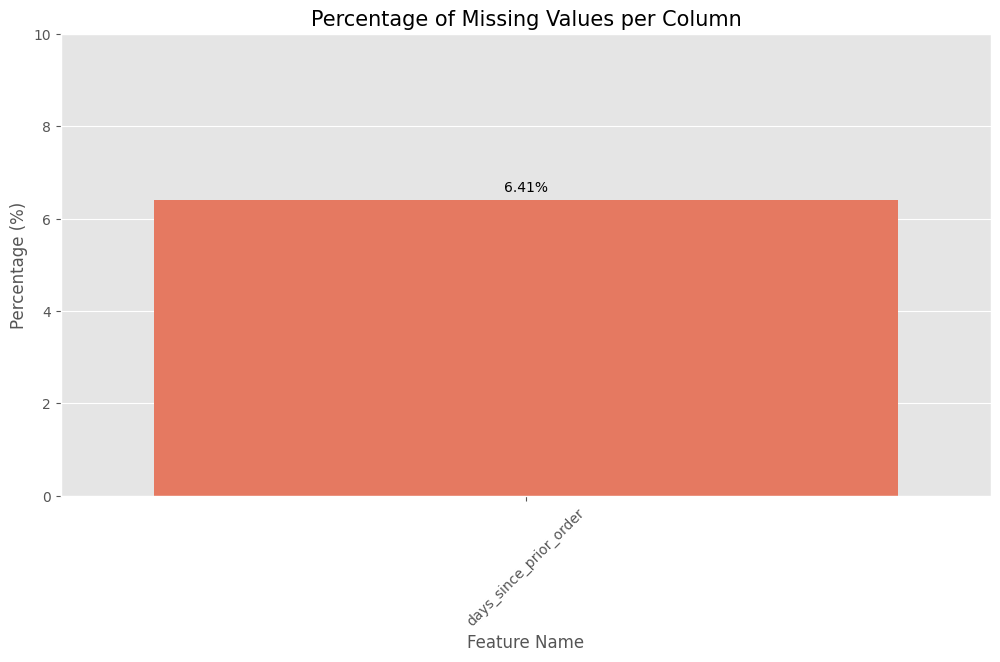

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. حساب عدد ونسبة القيم المفقودة لكل عمود
missing_values = instacart_data.isnull().sum()
missing_percentage = (missing_values / len(instacart_data)) * 100

# 2. تصفية الأعمدة التي تحتوي على قيم مفقودة فقط وترتيبها
missing_df = missing_percentage[missing_percentage > 0].sort_values(ascending=False).reset_index()
missing_df.columns = ['Column', 'Percentage']

# 3. رسم الـ Bar Plot
if not missing_df.empty:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Column', y='Percentage', data=missing_df, palette='Reds_r')

    # إضافة النسب المئوية فوق كل عامود
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

    plt.title('Percentage of Missing Values per Column', fontsize=15)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xlabel('Feature Name', fontsize=12)
    plt.xticks(rotation=45)
    plt.ylim(0, 10) # لتوضيح النسبة من 100
    plt.show()
else:
    print("No missing values found in the dataset! ")

# **Distribution plots for numeric features and target(s).**

## Target A (Classification)

Draw the distribution of the two columns that you will predict later.

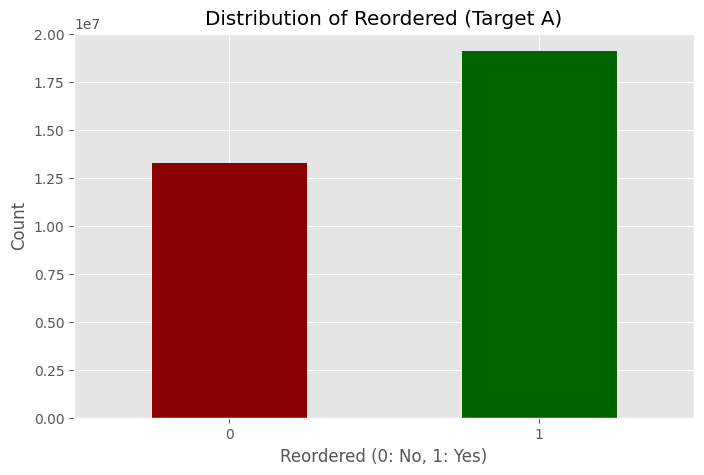

In [ ]:

plt.style.use('ggplot')

# 1. توزيع هدف التصنيف (Classification Target: reordered)

reorder_counts = instacart_data['reordered'].value_counts().sort_index()#لتلخيص ملايين الأسطر في جدول صغير جداً value_counts().sort_index() استخدمنا ال

plt.figure(figsize=(8, 5))
reorder_counts.plot(kind='bar', color=['darkred', 'darkgreen'])#(RAM)للتخفيف الثقل على الذاكرة المؤقتة  kind=barاستخدمنا ال
plt.title('Distribution of Reordered (Target A)')
plt.xlabel('Reordered (0: No, 1: Yes)')#عشان نعرف نسبة الفرق بين الطلبات التي اعيد طلبها و الطلبات التي لم يعاد طلبها
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## Consumer Behavior

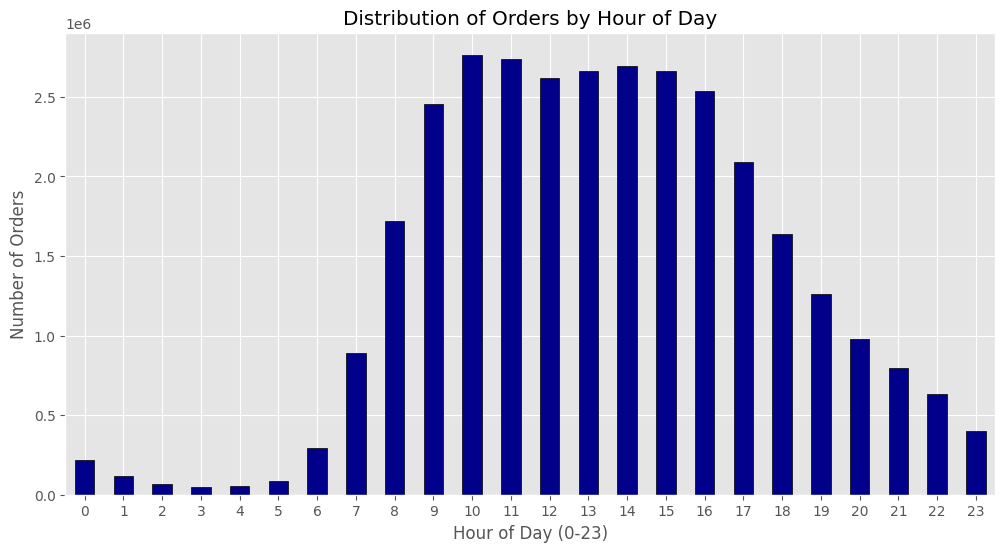

In [ ]:
# 2. توزيع ساعة الطلب
#لنعرف الفترة التي تكون فيها الطلبات كثيرة ( ساعة الذروة) او العكس
hour_counts = instacart_data['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hour_counts.plot(kind='bar', color='darkblue', edgecolor='black')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

### بنلاحظ انه الطلبات كثير بتكون بين فترة الساعة العاشرة صباحا الى الساعة الرابعة مساء

## Purchasing volume for all days of the week

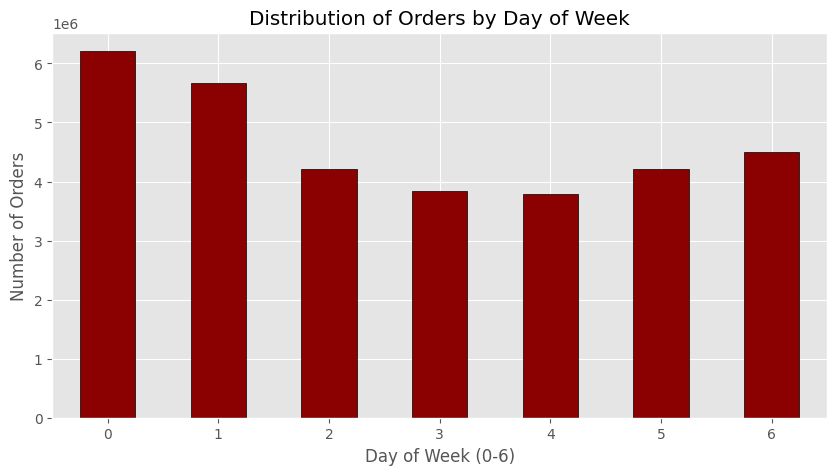

In [ ]:
# 3. توزيع أيام الأسبوع
dow_counts = instacart_data['order_dow'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
dow_counts.plot(kind='bar', color='darkred', edgecolor='black')
plt.title('Distribution of Orders by Day of Week')
plt.xlabel('Day of Week (0-6)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

## Regression Target: (days_since_prior_order)

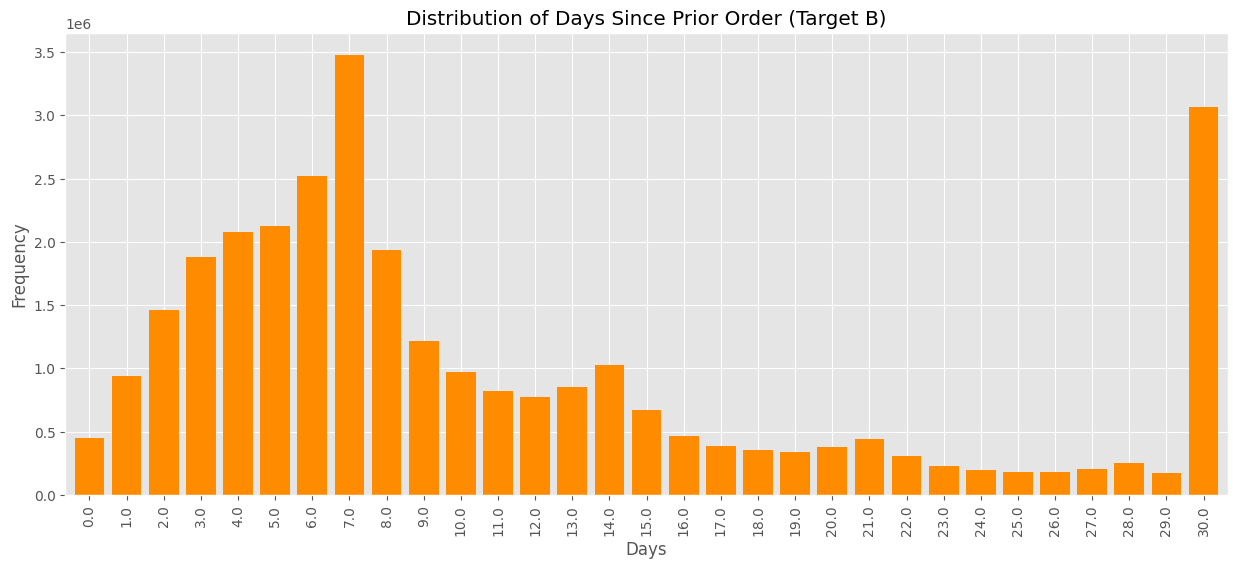

In [ ]:
# 4. توزيع الأيام منذ الطلب السابق (Regression Target: days_since_prior_order)
# ملاحظة: سنقوم بحذف القيم المفقودة مؤقتا للرسم فقط
days_counts = instacart_data['days_since_prior_order'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
days_counts.plot(kind='bar', color='darkorange', width=0.8)
plt.title('Distribution of Days Since Prior Order (Target B)')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

### بنلاحظ بوجود اعلى القمم عند اليوم ال7 واليوم ال30 وهذا الاشي بعني انه الناس يميلون للطلب اسبوعيا و شهريا

# **Categorical cardinality analysis.**

In [ ]:

categorical_cols = instacart_data.select_dtypes(include=['object', 'category']).columns#ب هذا اللاين بعمل على فلترة او اختيار الاعمدة الفئوية
categorical_cols


Index(['eval_set', 'product_name', 'department', 'aisle'], dtype='object')

### الكود حددلنا الاعمدة الي بتحتوي على اعمدة فئوية بالاوت بوت

In [ ]:
cardinality_df = pd.DataFrame({
    'Feature': categorical_cols,
    'Cardinality': [instacart_data[col].nunique() for col in categorical_cols]
}).sort_values(by='Cardinality', ascending=False)


/tmp/ipython-input-2427700124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


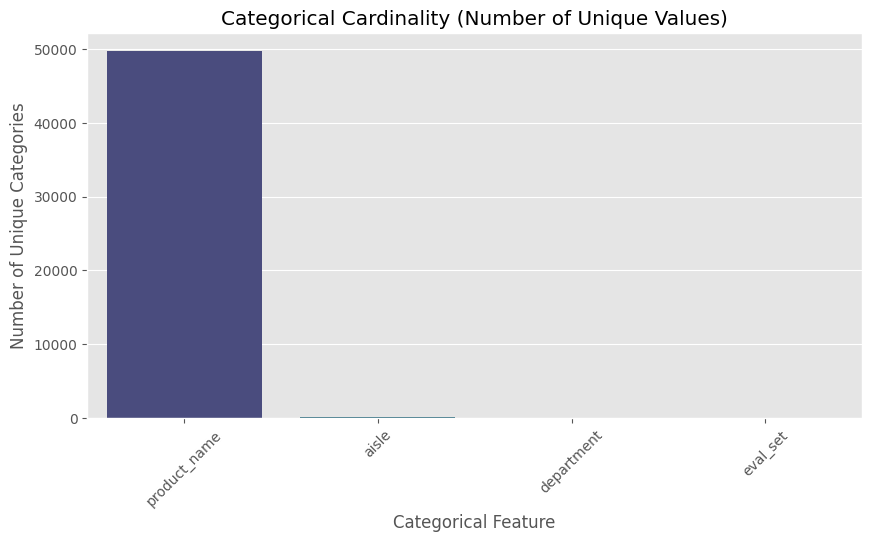

,Feature,Cardinality
1,product_name,49677
3,aisle,134
2,department,21
0,eval_set,1


In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=cardinality_df,
    x='Feature',
    y='Cardinality',
    palette='viridis'
)

plt.title('Categorical Cardinality (Number of Unique Values)')
plt.xlabel('Categorical Feature')
plt.ylabel('Number of Unique Categories')
plt.xticks(rotation=45)
plt.show()

cardinality_df

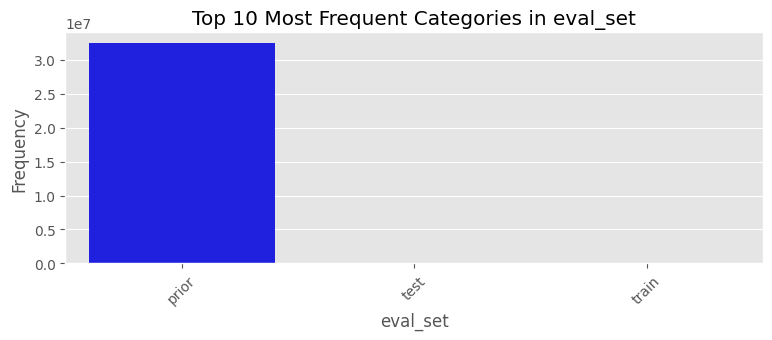

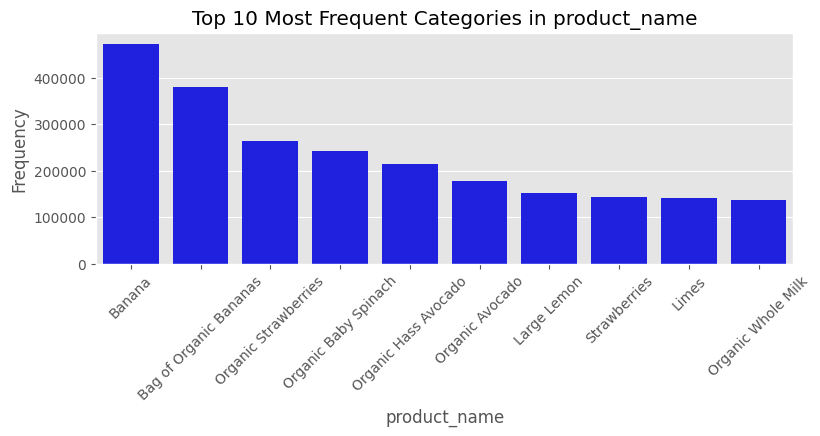

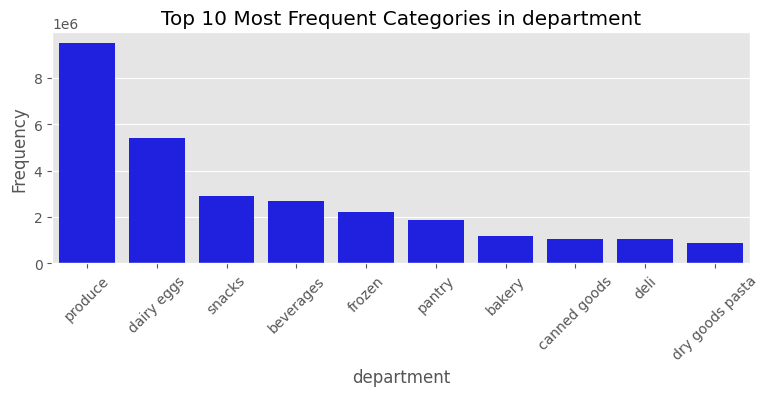

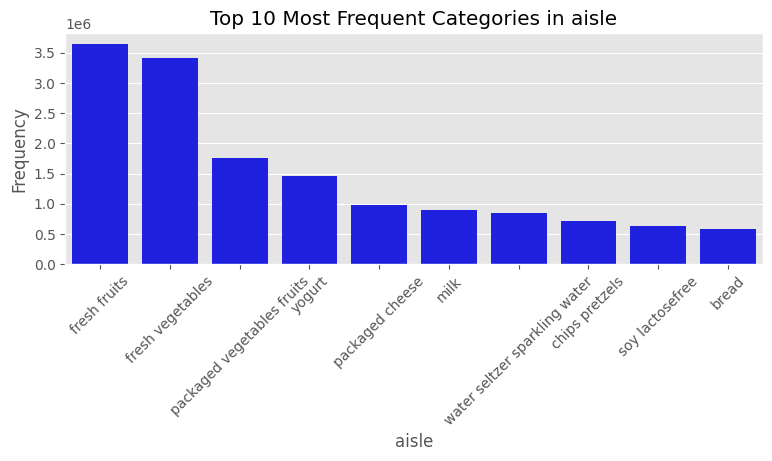

In [ ]:
TOP_K = 10  # عدد القيم الأكثر تكرارًا

for col in categorical_cols:
    top_k = instacart_data[col].value_counts().head(TOP_K)

    plt.figure(figsize=(9, 3))
    sns.barplot(
        x=top_k.index.astype(str),
        y=top_k.values,
        color='blue'
    )

    plt.title(f'Top {TOP_K} Most Frequent Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


# **Correlation matrix, heatmap and pairwise scatter plots for selected numeric features.**

## Correlation Heatmap

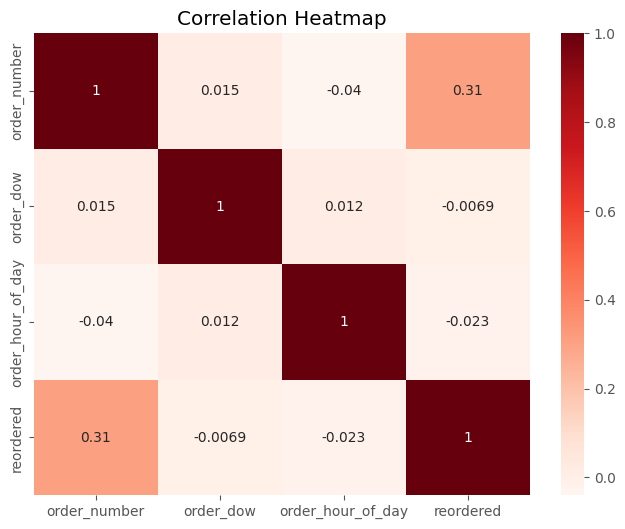

In [80]:

# اختيار أهم الأعمدة الرقمية
numeric_cols = ['order_number', 'order_dow', 'order_hour_of_day', 'reordered']

# رسم الخريطة الحرارية ببساطة
plt.figure(figsize=(8, 6))
sns.heatmap(instacart_data[numeric_cols].corr(), annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

## Pairwise Scatter Plots

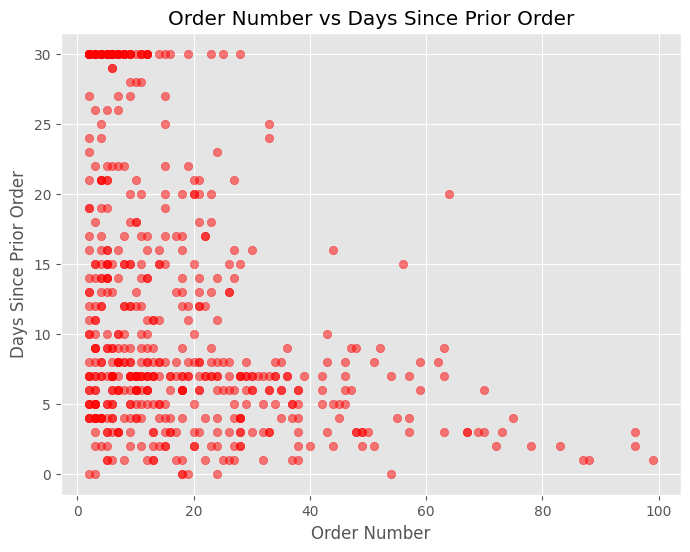

In [85]:
# أخذ عينة عشوائية بسيطة (600 نقطة)
sample_df = instacart_data.sample(600)

plt.figure(figsize=(8, 6))
plt.scatter(sample_df['order_number'], sample_df['days_since_prior_order'], alpha=0.5, color='red')
plt.title('Order Number vs Days Since Prior Order')
plt.xlabel('Order Number')
plt.ylabel('Days Since Prior Order')
plt.show()

## Target vs Feature

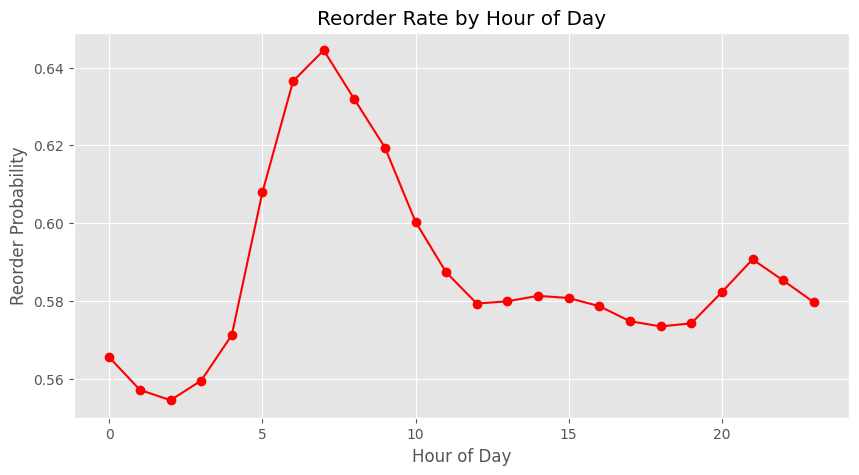

In [87]:
# حساب متوسط إعادة الطلب لكل ساعة
hourly_trend = instacart_data.groupby('order_hour_of_day')['reordered'].mean()

plt.figure(figsize=(10, 5))
hourly_trend.plot(color='red', marker='o')
plt.title('Reorder Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Reorder Probability')
plt.grid(True)
plt.show()